<center><img width="25%" src="https://www.camaramirimdoce.sc.gov.br/media/noticia/resumo-da-sessao-10-06-2019-111.png?w=848&h=450&t=P&c=f0f0f0&q=80&v=2"></center>

---

<br>

# Projeto de análise de atritos entre os membros da equipe utilizando os dados do RH

<br>

### A análise de Recursos Humanos (RH) consiste na coleta e análise de dados relevantes para aprimorar o desempenho da equipe de trabalho. Esses dados são coletados de forma contínua pelo departamento de RH e utilizados tanto para atingir os objetivos do RH quanto para beneficiar a organização como um todo. Ao fornecer uma visão embasada em dados, essa análise possibilita identificar o que é eficaz e o que não é dentro da empresa, com base em métricas estabelecidas. <br>

### Objetivo: Essa iniciativa visa examinar e compreender padrões e causas de conflitos internos na organização, fornecendo informações relevantes para compreender a taxa e tendência de atrito entre os membros da equipe. <br>

### Dataset: Os dados usados para a análise foram obtidos de terceiros do Kaggle.

### Passo 1 - Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

### Passo 2 - Lendo os 2 arquivos em CSV e transformando-os em DataFrame do Pandas

In [4]:
df_funcionario = pd.read_csv("empregados.csv", encoding='latin-1')
df_nivel_educacional = pd.read_csv("nivel_de_educacao.csv", encoding='latin-1')

### Passo 3 - Conhecendo e entendendo os dados das duas tabelas

In [5]:
# Mostrando as 5 primeiras linhas do Dataframe dos empregados
display(df_funcionario.head())

,ID do Empregado,Primeiro nome,Sobrenome,Gênero,Idade,Viagem de negócios,Departamento,Distância de Casa (KM),Estado,Etnia,...,Estado civil,Salário,Nível de opção de ações,Ao longo do tempo,Data de contratação,Atrito,Anos na empresa,Anos na função mais recente,Anos desde a última promoção,Anos com gerente atual
0,3012-1A41,Leonelle,Simco,Feminino,30,Algumas viagens,Vendas,27,Illinois,Branco,...,Divorciado,102059,1,Não,40911,Não,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Masculino,38,Algumas viagens,Vendas,23,California,Branco,...,Solteiro,157718,0,Sim,40912,Não,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Masculino,43,Algumas viagens,Recursos Humanos,29,California,Asiático ou Asiático Americano,...,Casado,309964,1,Não,40912,Não,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Não-binário,39,Algumas viagens,Tecnologia,12,Illinois,Branco,...,Casado,293132,0,Não,40913,Não,10,10,10,0
4,42CC-040A,Stace,Savege,Feminino,29,Algumas viagens,Recursos Humanos,29,California,Branco,...,Solteiro,49606,0,Não,40913,Sim,6,1,1,6


In [6]:
# Mostrando as informações do Dataframe dos empregados
print(df_funcionario.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID do Empregado               1470 non-null   object
 1   Primeiro nome                 1470 non-null   object
 2   Sobrenome                     1470 non-null   object
 3   Gênero                        1470 non-null   object
 4   Idade                         1470 non-null   int64 
 5   Viagem de negócios            1470 non-null   object
 6   Departamento                  1470 non-null   object
 7   Distância de Casa (KM)        1470 non-null   int64 
 8   Estado                        1470 non-null   object
 9   Etnia                         1470 non-null   object
 10  Educação                      1470 non-null   int64 
 11  Campo da educação             1470 non-null   object
 12  Cargo de Trabalho             1470 non-null   object
 13  Estado civil      

#### Observasse que a tabela de funcionários não possui valores nulos e que possue 23 colunas e 1.470 linhas. E que a coluna Data de Contratação está com o tipo de dado inteiro em vez de Datetime (Data). Será realizado a conversão da coluna de Data de Contratação para o tipo correto. 

In [7]:
# Importação da biblioteca datetime
from datetime import datetime

# Transformação da coluna Data de Contratação em um coluna no tipo Datetime, especificando qual será o formato em Ano-Mês-Dia. 
df_funcionario['Data de contratação'] = pd.to_datetime(df_funcionario['Data de contratação'], origin='1899-12-30', unit='D')

In [8]:
# Identificando qual é a data de início e data final do Dataframe dos empregados
maior_data = df_funcionario['Data de contratação'].max()
menor_data = df_funcionario['Data de contratação'].min()
print(f'{maior_data}\n{menor_data}')

2022-12-31 00:00:00
2012-01-03 00:00:00


In [9]:
# Mostrando as estatísticas descritivas de todas as colunas numéricas do Dataframe
print(df_funcionario.describe())

             Idade  Distância de Casa (KM)     Educação        Salário  \
count  1470.000000             1470.000000  1470.000000    1470.000000   
mean     28.989796               22.502721     2.912925  112956.497959   
std       7.993055               12.811124     1.024165  103342.889222   
min      18.000000                1.000000     1.000000   20387.000000   
25%      23.000000               12.000000     2.000000   43580.500000   
50%      26.000000               22.000000     3.000000   71199.500000   
75%      34.000000               33.000000     4.000000  142055.750000   
max      51.000000               45.000000     5.000000  547204.000000   

       Nível de opção de ações  Anos na empresa  Anos na função mais recente  \
count              1470.000000      1470.000000                  1470.000000   
mean                  0.793878         4.562585                     2.293197   
std                   0.852077         3.288048                     2.539093   
min          

In [10]:
# Verificando se existe linhas duplicadas no Dataframe dos empregados
var_copia = df_funcionario.duplicated()
var_copia.sum()

0

#### Não foi encontrado nenhuma linha duplicada no Dataframe dos empregados.

In [11]:
# Verificando a quantidade de linhas e colunas
df_funcionario.shape

(1470, 23)

#### Como não foi necessário realizar nenhuma exclusão de linhas ou colunas no Dataframe dos empregados, por não conter valores ausentes ou duplicados, o conjunto de dados permaneceu com 1.470 linhas e 23 colunas. 

In [12]:
# Mostrando todas as linhas do Dataframe de Nível Educaional e suas informações
display(df_nivel_educacional)
print(df_nivel_educacional.info())
df_nivel_educacional.shape

,ID do Nível de Educação,Nível de Educação
0,1,Sem qualificações formais
1,2,Ensino médio
2,3,Bacharéis
3,4,Mestres
4,5,Doutorado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID do Nível de Educação  5 non-null      int64 
 1   Nível de Educação        5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None


(5, 2)

#### Observasse que o Dataframe do Nível Educacional não possui valores nulos e que possue 2 colunas e 5 linhas. Não é necessário fazer uma verificação de linhas duplicadas, por se tratar de um conjunto de dados pequeno, onde é possivel verificar visualmente e nem realizar uma análise estatísticas descritivas de suas colunas.

In [13]:
print(df_funcionario.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID do Empregado               1470 non-null   object        
 1   Primeiro nome                 1470 non-null   object        
 2   Sobrenome                     1470 non-null   object        
 3   Gênero                        1470 non-null   object        
 4   Idade                         1470 non-null   int64         
 5   Viagem de negócios            1470 non-null   object        
 6   Departamento                  1470 non-null   object        
 7   Distância de Casa (KM)        1470 non-null   int64         
 8   Estado                        1470 non-null   object        
 9   Etnia                         1470 non-null   object        
 10  Educação                      1470 non-null   int64         
 11  Campo da educação             

### Passo 4 - Análise Exploratória dos Dados <br>
Colunas qualitativas:  
* Gênero                                      
* Viagem de negócios           
* Departamento                      
* Estado                        
* Etnia                         
* Educação          
* Campo da educação  
* Cargo de Trabalho             
* Estado civil 
* Ao longo do tempo            
* Data de contratação  
<br>

Colunas quantitativas:
* Distância de Casa (KM)
* Idade            
* Salário                      
* Nível de opção de ações                
* Atrito                        
* Anos na empresa              
* Anos na função mais recente   
* Anos desde a última promoção  
* Anos com gerente atual         

#### a) Coluna Atrito (Taxa de desgaste entre os membros da equipe)

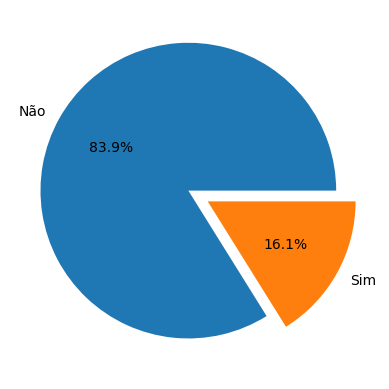

In [12]:
# Verificando qual é a taxa de desgate na empresa

# Quantidade de valor sim e não = df_funcionario.Atrito.value_counts() >>> Resposta: Não = 1233 e Sim = 237
# Total de funcionarios = len(df_funcionario) >>> Resposta: 1470
# % = (1233/1470) x 100 e (237/1470) x 100
df_funcionario.Atrito.value_counts()/len(df_funcionario)*100

# Agrupando pela coluna Atrito e realizando a contagem da quantidade dos seus valores  
# Mostra a quantidade de funcionário agrupados pela existencia de atrito ou não
df_atrito = df_funcionario.groupby('Atrito')['Atrito'].count()

# Grafico de pizza ilustrando o agrupamento da coluna Atrito com base na contagem dos seus valores
plt.pie(df_atrito, explode=[0.05,0.1], labels=['Não', 'Sim'], radius=1.0, autopct='%1.1f%%', shadow=False);
# explode = Destacando a fatia menor
# labels = Legenda de cada fatia
# radius = Valor do raio 
# autopct = formato da porcentagem
# shadow = Sem sombra no grafico

#### Análise: A coluna Atrito é composta por dois valores: "NÃO", indicando que o funcionário não experimentou nenhum tipo de desgaste na empresa, e "SIM", representando o caso contrário, em que o funcionário teve algum tipo de desgaste. De acordo com o cálculo realizado no período de 03/01/2012 a 31/12/2022, foi constatado um índice de atrito de 16,12%, correspondendo a um total de 1.470 funcionários.

#### b) Criação da função para transformar os valores da coluna Atrito (Sim = 1 e Não = 0) e aplicação na coluna Atrito

In [13]:
# Se o valor for igual a Sim retorna 1, caso o valor seja igual a Não retorne 0
def sim_nao_para_1_0(valor):
    if valor == 'Sim':
        return 1
    elif valor == 'Não':
        return 0
    else:
        return valor
    
# Aplicando a função sim_nao_para_1_0 na coluna de Atrito e seu armazenamento em um novo dataframe
df_funcionario['Atrito'] = df_funcionario['Atrito'].map(sim_nao_para_1_0)
df_funcionario['Atrito'].head()
# A função map está aplicando a função sim_nao_para_1_0 criada em todas as linhas da coluna Atrito. 

0    0
1    0
2    0
3    0
4    1
Name: Atrito, dtype: int64

#### c) Coluna de gênero

Gênero
Feminino             675
Masculino            651
Não-binário          124
Prefiro não dizer     20
Name: Gênero, dtype: int64

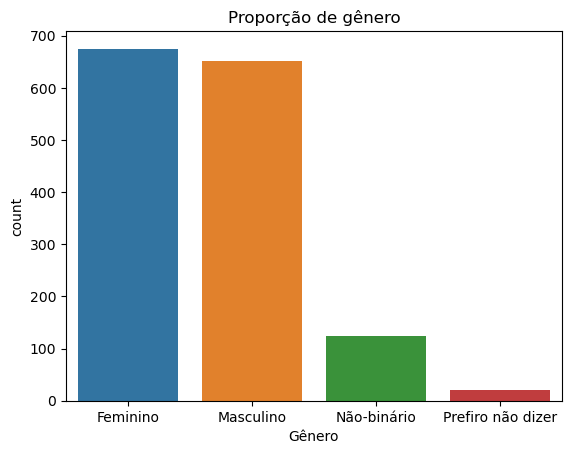

In [14]:
# Agrupando pela coluna Gênero e realizando a contagem de seus valores  
# Mostra a quantidade de funcionário agrupados por gênero
df_genero = df_funcionario.groupby('Gênero')['Gênero'].count()
display(df_genero)

# Visualizando a proporção de gênero através do gráfico de contagem
sns.countplot(data = df_funcionario, x = 'Gênero')
plt.title('Proporção de gênero');

In [16]:
# Agrupando pelas colunas Gênero e Atrito e realizando a contagem da quantidade de Gênero. Exibindo como tabela (to_frame)
df_funcionario.groupby(['Gênero', 'Atrito'])['Gênero'].count().to_frame() 

Gênero
Gênero            Atrito        
Feminino          0          571
                  1          104
Masculino         0          537
                  1          114
Não-binário       0          105
                  1           19
Prefiro não dizer 0           20

In [30]:
# Agrupando pela coluna Gênero e realizando a média dos valores da coluna atritos. Exibindo como tabela (to_frame)
# sort_values('Atrito', ascending=False) = ordenando pelos valores da coluna de atrito na ordem decrescente
# Usar a média em vez da contagem remove o ruiod e fornece informações mais claras sobre os dados com base na proporção de gênero.
df_funcionario.groupby('Gênero')['Atrito'].mean().to_frame().sort_values('Atrito', ascending=False)  

,Atrito
Gênero,
Masculino,0.175115
Feminino,0.154074
Não-binário,0.153226
Prefiro não dizer,0.000000


In [20]:
# Criando uma coluna de Renda mensal do salário
df_funcionario['Renda mensal'] = df_funcionario['Salário'] / 12

# Agrupando pelas colunas Gênero e Atrito e realizando a média da Renda Mensal. Exibindo como tabela (to_frame)
df_funcionario.groupby(['Gênero', 'Atrito'])['Renda mensal'].mean().to_frame() 

Renda mensal
Gênero            Atrito              
Feminino          0       10103.004962
                  1        6154.488782
Masculino         0        9730.863128
                  1        7353.119883
Não-binário       0        9568.923016
                  1        7702.631579
Prefiro não dizer 0       10673.612500

#### Análise: De acordo com os cálculos realizados no período de 03/01/2012 a 31/12/2022, foi constatado que os funcionários do gênero Masculino estão deixando a empresa mais do que os funcionários do gênero feminino. E que ambos os gêneros que saem da organização (Atrito = 1) possuem uma renda média mensal inferior em comparação com os funcionarios que permanecem (Sem atrito = 0).

#### d) Coluna de Departamento

,Departamento,Quantidade
1,Tecnologia,961
2,Vendas,446
0,Recursos Humanos,63


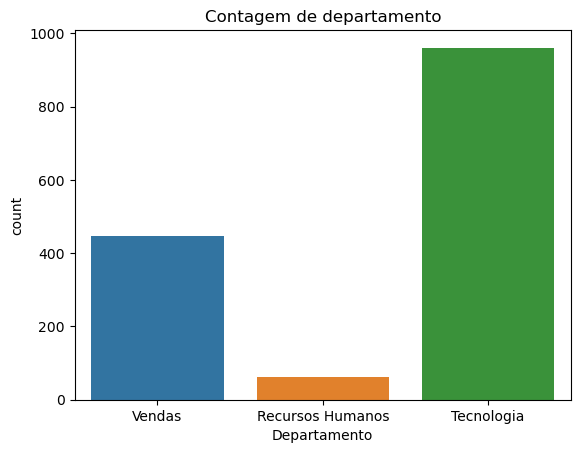

In [32]:
# Agrupando pela coluna Departamento e realizando a contagem da quantidade de funcionários. Ordenando pela quantidade em ordem decrescente
# Mostra a quantidade de funcionário agrupados por Departamento
df_departamento = df_funcionario.groupby('Departamento').size().reset_index(name='Quantidade')
df_departamento_ordenado = df_departamento.sort_values(by='Quantidade', ascending=False)
display(df_departamento_ordenado)

# Visualizando a proporção de Departamento atraves do gráfico de contagem
sns.countplot(data = df_funcionario, x = 'Departamento')
plt.title('Contagem de departamento');

In [18]:
# Agrupando pela coluna Departamento e realizando a média dos valores da coluna Atrito. Exibindo como tabela (to_frame)  
# sort_values('Atrito', ascending=False) = ordenando pelos valores da coluna de atrito na ordem decrescente
df_funcionario.groupby('Departamento')['Atrito'].mean().to_frame().sort_values('Atrito', ascending=False) 

,Atrito
Departamento,
Vendas,0.206278
Recursos Humanos,0.190476
Tecnologia,0.138398


In [19]:
# Agrupando pelas colunas Departamento e Atrito e realizando a contagem dos valores da coluna Departamento. Exibindo como tabela (to_frame)  
df_funcionario.groupby(['Departamento', 'Atrito'])['Departamento'].count().to_frame() 

Departamento
Departamento     Atrito              
Recursos Humanos 0                 51
                 1                 12
Tecnologia       0                828
                 1                133
Vendas           0                354
                 1                 92

#### Análise: Após realizar os cálculos referentes ao período de 03/01/2012 a 31/12/2022, constatou-se que o Departamento de Vendas apresenta o maior índice de atrito dentro da empresa. Isso é particularmente interessante, considerando que o departamento de Vendas é o segundo maior em termos de número de funcionários, enquanto o departamento de Tecnologia possui mais colaboradores, porém menos casos de atrito.

#### e) Coluna Campo da educação

In [28]:
# Agrupando pela coluna Campo da educação e realizando a contagem da quantidade de funcionários. Ordenando pela quantidade em ordem decrescente
# Mostra a quantidade de funcionário agrupados por Campo de educação

resultado = df_funcionario.groupby('Campo da educação').size().reset_index(name='Quantidade')
resultado_ordenado = resultado.sort_values(by='Quantidade', ascending=False)
resultado_ordenado

,Campo da educação,Quantidade
0,Ciência da Computação,440
7,Sistemas de informação,363
4,Marketing,325
1,Economia,101
2,Estudos de Negócios,94
5,Outro,82
3,Graduação Técnica,38
6,Recursos Humanos,27


In [22]:
# Agrupando pelas colunas Campo da educação e Atrito e realizando a média dos valores da coluna Atrito. Exibindo como tabela (to_frame)  
# sort_values('Atrito', ascending=False) = ordenando pelos valores da coluna de Atrito na ordem decrescente
df_funcionario.groupby('Campo da educação')['Atrito'].mean().to_frame().sort_values('Atrito', ascending=False) 

,Atrito
Campo da educação,
Graduação Técnica,0.315789
Recursos Humanos,0.259259
Estudos de Negócios,0.212766
Marketing,0.200000
Economia,0.158416
Outro,0.134146
Ciência da Computação,0.134091
Sistemas de informação,0.129477


#### Análise: 

In [33]:
# Agrupando pela coluna Cargo de Trabalho e realizando a média da quantidade de Atrito
# sort_values('Atrito', ascending=False) = ordenando pelos valores da coluna de atrito na ordem decrescente
df_cargo = df_funcionario.groupby('Cargo de Trabalho')['Atrito'].mean().to_frame().sort_values('Atrito', ascending=False) # to_frame = Mostrando com tabela
df_cargo.head()

,Atrito
Cargo de Trabalho,
Representante de vendas,0.397590
Recrutador,0.375000
Cientista de dados,0.237548
Executivo de vendas,0.174312
Engenheiro de software,0.159864


In [34]:
# Agrupando pelas colunas Cargo de Trabalho e Atrito e realizando a contagem da quantidade de Cargo de Trabalho
df_funcionario.groupby(['Cargo de Trabalho', 'Atrito'])['Cargo de Trabalho'].count().to_frame() # to_frame = Mostrando com tabela

Cargo de Trabalho
Cargo de Trabalho                    Atrito                   
Cientista de dados                   0                     199
                                     1                      62
Engenheiro de aprendizado de máquina 0                     136
                                     1                      10
Engenheiro de software               0                     247
                                     1                      47
Engenheiro de software senior        0                     123
                                     1                       9
Executivo de RH                      0                      25
                                     1                       3
Executivo de vendas                  0                     270
                                     1                      57
Gerente                              0                      35
                                     1                       2
Gerente de análise                   0                      49
                                     1                       3
Gerente de engenharia                0                      73
                                     1                       2
Gestor de RH                         0                       4
RH parceiro de negócios              0                       7
Recrutador                           0                      15
                                     1                       9
Representante de vendas              0                      50
                                     1                      33

In [35]:
# Agrupando pelas colunas Cargo de Trabalho e Atrito e realizando a média da quantidade de Renda mensal
df_funcionario.groupby(['Cargo de Trabalho', 'Atrito'])['Renda mensal'].mean().to_frame() # to_frame = Mostrando com tabela

Renda mensal
Cargo de Trabalho                    Atrito              
Cientista de dados                   0        4802.715243
                                     1        4257.881720
Engenheiro de aprendizado de máquina 0       10928.809436
                                     1        9735.141667
Engenheiro de software               0        4524.210189
                                     1        3313.039007
Engenheiro de software senior        0       10369.120596
                                     1       12485.824074
Executivo de RH                      0        7387.953333
                                     1       11826.638889
Executivo de vendas                  0        9552.320062
                                     1       10779.859649
Gerente                              0       26324.964286
                                     1       28840.166667
Gerente de análise                   0       28784.227891
                                     1       30334.833333
Gerente de engenharia                0       23545.696347
                                     1       35139.916667
Gestor de RH                         0       37444.229167
RH parceiro de negócios              0       26166.869048
Recrutador                           0        3277.511111
                                     1        2903.592593
Representante de vendas              0        3619.773333
                                     1        3036.916667

#### Análise: Correspondendo à taxa de desgaste do departamento, os representantes de vendas tendem a deixar a empresa mais do que outros cargos.

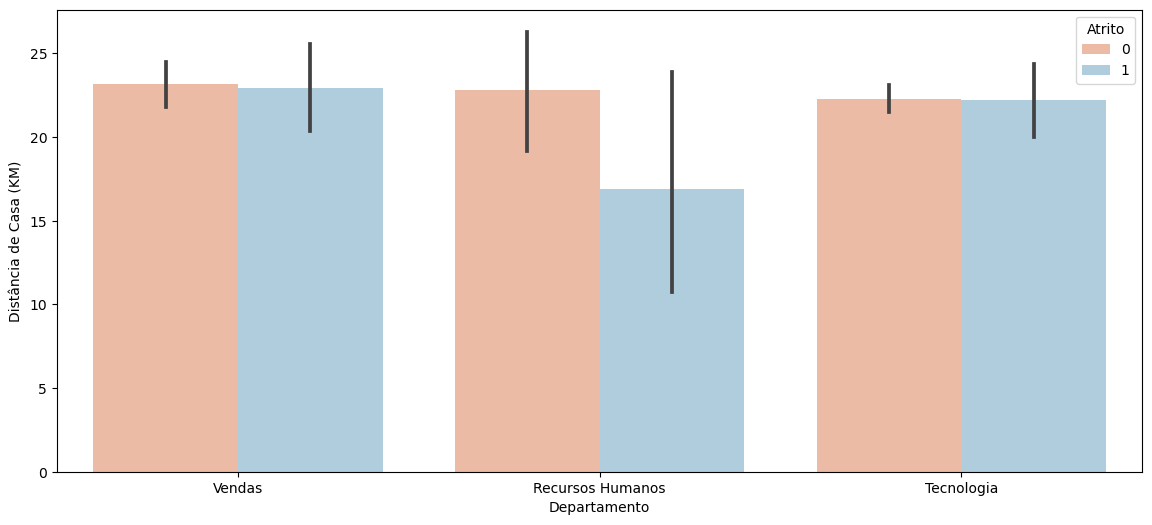

In [36]:
#a distância afeta o atrito
var_paleta = sns.color_palette("RdBu", n_colors=2)

plt.figure(figsize = (14, 6))
sns.barplot(x='Departamento', y='Distância de Casa (KM)', data=df_funcionario, hue='Atrito', palette= var_paleta);

#### Análise: A maior parte do desgaste do departamento de RH foi influenciada pela distância da empresa de sua casa.

In [37]:
# Agrupando pela coluna Atrito e realizando a média por idade
df_funcionario.groupby('Atrito')['Idade'].mean()

Atrito
0    29.460665
1    26.540084
Name: Idade, dtype: float64

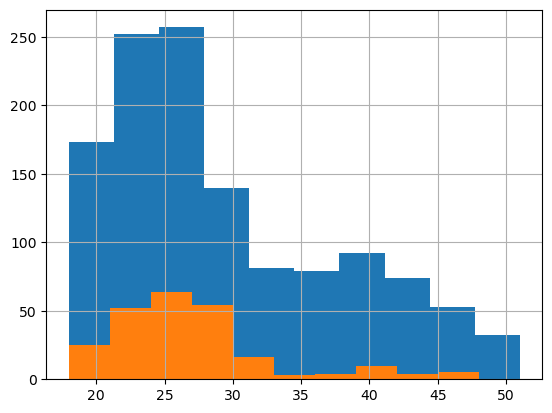

In [38]:
df_funcionario.groupby('Atrito').Idade.hist(bins=10);

#### Análise: Os mais jovens tendem a sair em comparação com os mais velhos.

In [ ]:
# Agrupando pelas colunas Etnia e Atrito e realizando a média da Renda mensal
# sort_values(['Atrito', 'Renda mensal'], ascending=False) = ordenando pelos valores das colunas de Atrito e Renda Mensal na ordem decrescente
df_funcionario.groupby(['Etnia', 'Atrito'])['Renda mensal'].mean().to_frame().sort_values(['Atrito', 'Renda mensal'], ascending=False) # to_frame = Mostrando com tabela

In [ ]:
# Chave pprimária da tabela Nivel de educação é a coluna ID do Nível de Educação
display(df_nivel_educacional)

# Chave estrangeira da tabela Nivel de educação é a coluna Educação da tabela Educação
valor_contagens = df_funcionario['Educação'].value_counts()
print(valor_contagens)

In [ ]:
# Criação da função nivel_educacao para conectar os valores do Dataframe de df_funcionario e df_nivel_educacional

def nivel_educacao(ID_nivel):
    if ID_nivel == 1:
        return 'Sem qualificações formais'
    elif ID_nivel == 2:
        return 'Ensino médio'
    elif ID_nivel == 3:
        return 'Bacharéis'
    elif ID_nivel == 4:
        return 'Mestres'
    else:
        return 'Doutorado'
    
# Criação da Dataframe Educacao usando o valor da coluna Educação e aplicando a função nivel_educacao
df_educacao = df_funcionario['Educação'].map(nivel_educacao)

# Criação da coluna Nova educação utilizando o Dataframe Educacao
df_funcionario['Nova_educação'] = df_educacao

# Mostra os valores da coluna Educação com os valores do Dataframe df_nivel_educacional 
display(df_funcionario['Nova_educação'].head(3))

In [ ]:
# Agrupando pelas colunas Nova_educação e Atrito e realizando a média pela quantidade de atrito
# sort_values('Atrito', ascending=False) = ordenando pelo valor da coluna de Atrito na ordem decrescente
df_funcionario.groupby('Nova_educação')['Atrito'].mean().to_frame().sort_values('Atrito', ascending=False) # to_frame = Mostrando com tabela

In [ ]:
# Agrupando pelas colunas Nova_educação e Atrito e realizando a contagem pela quantidade de atrito
df_funcionario.groupby(['Nova_educação', 'Atrito'])['Atrito'].count().to_frame() # to_frame = Mostrando com tabela

In [ ]:
# Agrupando pela coluna Nova_educação e realizando a média da Renda mensal
# sort_values('Renda mensal') = ordenando pelo valor da coluna da Renda mensal na ordem crescente
df_funcionario.groupby('Nova_educação')['Renda mensal'].mean().to_frame().sort_values('Renda mensal') # to_frame = Mostrando com tabela

In [ ]:
# Agrupando pela coluna Anos na empresa e realizando a média da quantidade de Atrito
# sort_values('Atrito', ascending=False) = ordenando pelo valor da coluna Atrito na ordem decrescente
df_funcionario.groupby('Anos na empresa')['Atrito'].mean().to_frame().sort_values('Atrito', ascending=False) # to_frame = Mostrando com tabela